# 워드 클라우드
- 한빛출판네트워크 > 새로나온책(200권) > TAG 
- TAG를 워드클라우드로 만들기

#### 1. 크롤링

In [1]:
import requests, re
import pandas as pd
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

In [2]:
base_url = 'https://www.hanbit.co.kr'
sub_url = '/store/books/new_book_list.html'
url = base_url + sub_url
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

In [3]:
lis = soup.select('.sub_book_list')
len(lis)

20

In [4]:
li = lis[0]
href = li.find('a')['href']
href

'/store/books/look.php?p_code=B2831223974'

In [5]:
res = requests.get(base_url + href)
book_soup = BeautifulSoup(res.text, 'html.parser')

In [6]:
tags = book_soup.select('.tag_area > a')
len(tags)

14

In [7]:
tag_list = []
for a in tags:
    tag_list.append(a.get_text().strip())
print(tag_list)

['파이썬', '엑셀', 'VBA', '셀수식', '엑셀 자동화', '판다스', '파워 쿼리', '파워 피벗', '아나콘다 파이썬', '주피터 노트북', '비주얼 스튜디오 코드', '넘파이', '사용자 정의 함수', 'UDF']


In [8]:
tag_list = []
for page in tqdm(range(1,11)):
    url = f'{base_url}{sub_url}?page={page}'
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    lis = soup.select('.sub_book_list')

    for li in lis:
        book_url = li.find('a')['href']
        res = requests.get(base_url + book_url)
        book_soup = BeautifulSoup(res.text, 'html.parser')
        tags = book_soup.select('.tag_area > a')
        for a in tags:
            tag_list.append(a.get_text().strip())

  0%|          | 0/10 [00:00<?, ?it/s]

In [9]:
tag_list[:10]

['파이썬',
 '엑셀',
 'VBA',
 '셀수식',
 '엑셀 자동화',
 '판다스',
 '파워 쿼리',
 '파워 피벗',
 '아나콘다 파이썬',
 '주피터 노트북']

In [10]:
len(tag_list)

2430

- tag_list를 frequency dictionary로 만들기

In [11]:
tag_set = set(tag_list)
len(tag_set)

1510

In [12]:
tag_dict = {item:tag_list.count(item) for item in tag_set}
# for item in tag_set:
#     tag_dict[item] = tag_list.count(item)

In [13]:
count = 0
for key, val in tag_dict.items():
    print(key, ':', val)
    count += 1
    if count > 5:
        break

 : 1
Kubernetes : 2
스벨트 : 1
오토캐드 초보 : 1
sapper : 1
해외주식 : 2


- 워드 클라우드 그리기

In [22]:
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['font.family']= 'Malgun Gothic'

In [23]:
wc = WordCloud(background_color='white',
               random_state=2022, 
               font_path='c:/Windows/Fonts/malgun.ttf')
wc = wc.generate_from_frequencies(tag_dict)

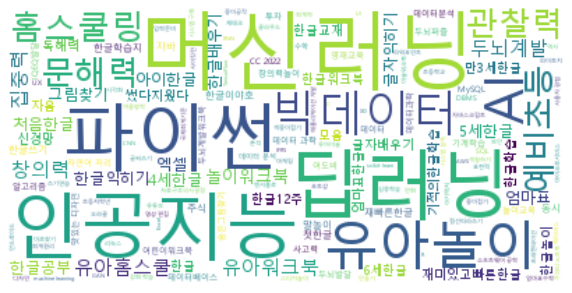

In [24]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

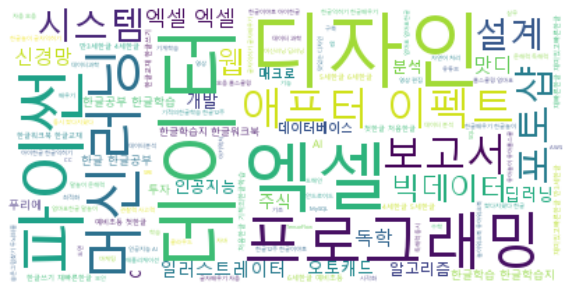

In [25]:
tag_text = ' '.join(tag_list)
wc = WordCloud(background_color='white',
               random_state=2022, max_words=500,
               font_path='c:/Windows/Fonts/malgun.ttf')
wc = wc.generate(tag_text)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()